In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Import data

In [27]:
data = pd.read_csv("marketing_campaign.csv")
data 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


#### Drop unwanted columns

In [28]:
df = data.drop(["Z_CostContact","Z_Revenue"], axis=1)
df 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


#### fill null values

In [29]:
df['Income'] = df['Income'].replace(np.NaN, df['Income'].mean())


### Scaling and Normilization

In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [31]:
data1['Education']= label_encoder.fit_transform(data1['Education'])
data1['Marital_Status']= label_encoder.fit_transform(data1['Marital_Status'])

In [32]:
data1=data1.drop("Dt_Customer", axis=1)

In [33]:
data1.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,3,5,62513.0,0,1,16,520,42,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,2,2,55635.0,0,1,34,235,65,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,4,3,33454.0,1,0,32,76,10,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,4,5,30351.0,1,0,19,14,0,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,4,5,5648.0,1,1,68,28,0,...,0,0,20,1,0,0,0,0,0,0


In [34]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data1)
data_scaled = pd.DataFrame(data_scaled, columns=data1.columns)
data_scaled.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.094526,0.033488,0.000034,0.000068,0.994848,0.000000,0.000000,0.000992,0.010866,0.001506,...,0.000171,0.000068,0.000120,0.0,0.0,0.0,0.0,0.0,0.0,0.000017
1,0.046817,0.042079,0.000043,0.000086,0.998016,0.000022,0.000022,0.000818,0.000237,0.000022,...,0.000022,0.000043,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.057705,0.027383,0.000028,0.000070,0.997937,0.000000,0.000000,0.000362,0.005936,0.000683,...,0.000028,0.000139,0.000056,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.225410,0.072341,0.000073,0.000182,0.971574,0.000036,0.000000,0.000948,0.000401,0.000146,...,0.000000,0.000146,0.000219,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.090900,0.033823,0.000068,0.000051,0.995277,0.000017,0.000000,0.001605,0.002954,0.000734,...,0.000051,0.000102,0.000085,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


#### Agglomerative Clustering(Hierarchical Clustering)

In [36]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

#### Dendrogram with WARD Linkge

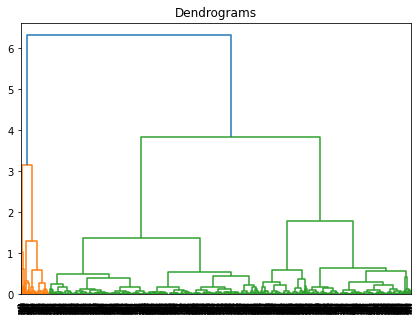

In [37]:
plt.figure(figsize=(7, 5))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold and cut the dendrogram:

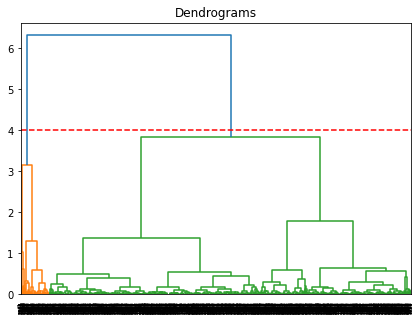

In [38]:
plt.figure(figsize=(7, 5))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

#### Dendrogram with AVERAGE Linkge

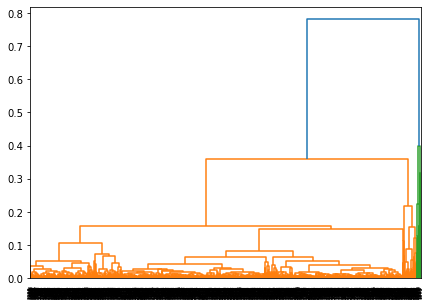

In [39]:
#create Dendrogram
plt.figure(figsize=(7, 5))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='average'))

#### Dendrogram with COMPLETE Linkge

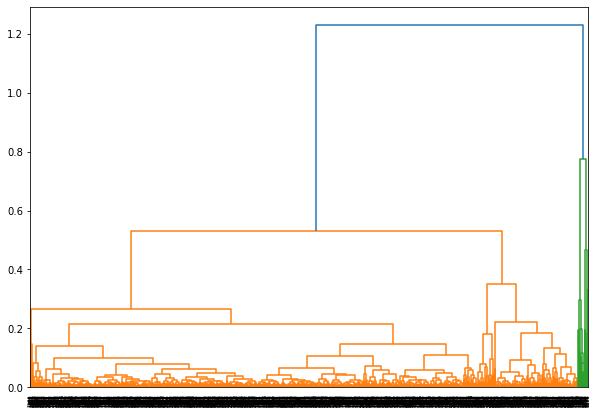

In [40]:
#create Dendrogram
plt.figure(figsize=(10, 7))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='complete'))

#### Dendrogram with singke Linkage

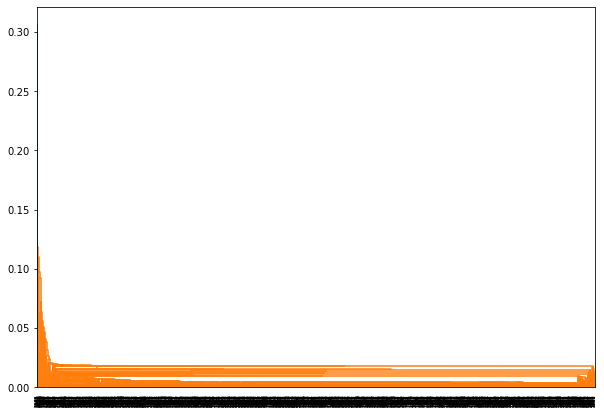

In [41]:
#create Dendrogram
plt.figure(figsize=(10, 7))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='single'))

#### Dendrogram with CENTROID Linkge

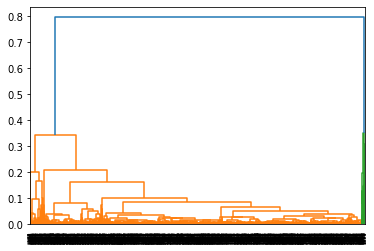

In [42]:
#create Dendrogram
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='centroid'))

In [43]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage="ward") 

In [44]:
y_hc=hc.fit_predict(data_scaled)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [45]:
clusters

,Clusters
0,2
1,2
2,2
3,0
4,2
...,...
2235,0
2236,2
2237,0
2238,0


In [46]:
df['Cluster_id']=hc.labels_

In [47]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster_id
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,2
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,2
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,2
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,...,10,6,0,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,...,7,6,0,0,0,0,0,0,0,2
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,...,4,8,0,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,...,2,9,0,0,0,0,0,0,1,0
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,...,0,20,1,0,0,0,0,0,0,3


In [48]:
df.groupby("Cluster_id").agg(['mean']).reset_index()

,Cluster_id,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,7773.592635,1968.932106,45550.371421,0.560414,0.550058,48.049482,200.765247,18.588032,98.288838,...,1.804373,5.062140,5.817031,0.052934,0.048331,0.019563,0.018412,0.006904,0.010357,0.108170
1,1,9089.832168,1975.251748,22151.797203,0.804196,0.181818,49.174825,13.244755,4.517483,15.832168,...,0.363636,2.832168,7.041958,0.111888,0.000000,0.000000,0.000000,0.000000,0.020979,0.118881
2,2,3544.115257,1967.813433,61467.319459,0.316750,0.515755,49.967662,418.069652,34.791045,235.763682,...,3.568823,6.742952,4.677446,0.082919,0.103648,0.121061,0.106136,0.019900,0.007463,0.183250
3,3,8960.772727,1976.318182,6967.090909,0.500000,0.363636,43.500000,12.045455,7.272727,89.090909,...,1.772727,1.545455,9.363636,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909


In [49]:
label = hc.fit_predict(data_scaled)
print(label)

[2 2 2 ... 0 0 0]


#### Getting centroid for AgglomerativeClustering

In [50]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(data_scaled, label)


C:\Users\Pushkar\anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NearestCentroid()

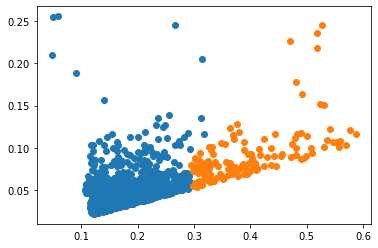

In [51]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = data_scaled[label == 0]
filtered_label1 = data_scaled[label == 1]


#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1])
plt.show()

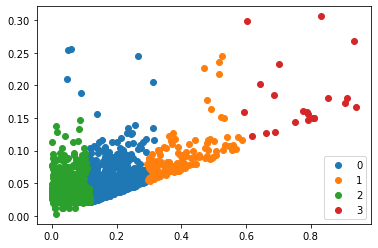

In [52]:
#Getting unique labels
 
u_labels1 = np.unique(label)
 
#plotting the results:
 
for i in u_labels1:
    plt.scatter(data_scaled.iloc[label == i , 0] , data_scaled.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

#### centroid for all clusters

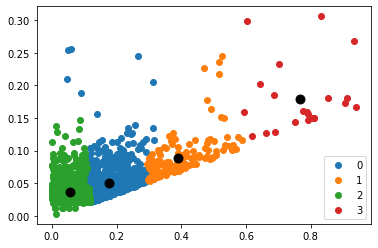

In [53]:
for i in u_labels1:
    plt.scatter(data_scaled.iloc[label == i , 0] , data_scaled.iloc[label == i , 1] , label = i)
plt.legend()
plt.scatter(clf.centroids_[:,0] , clf.centroids_[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## K-Mean Clustring

In [54]:
from sklearn.cluster import KMeans
from scipy .spatial.distance import cdist

#### Elbow curve / Scree plot

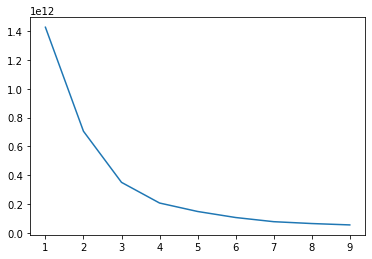

In [55]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.show()

In [56]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
#Load Data
data1 = load_digits().data
pca = PCA(2)
 
#Transform the data
df1 = pca.fit_transform(data1)
 
df1.shape

(1797, 2)

#### Apply K-Means to the Data

In [58]:
#Import required module
from sklearn.cluster import KMeans
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
#predict the labels of clusters.
label = kmeans.fit_predict(df1)
print(label)

[2 0 0 ... 0 1 1]


#### Plotting Label 0 K-Means Clusters

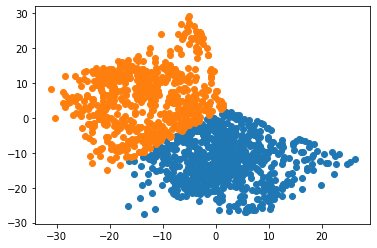

In [59]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = df1[label == 0]
filtered_label1 = df1[label == 1]


#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

#### Plotting Additional K-Means Clusters

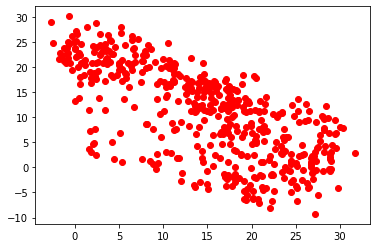

In [60]:
#filter rows of original data
filtered_label2 = df1[label == 2]

 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.show()

#### Plot All K-Means Clusters

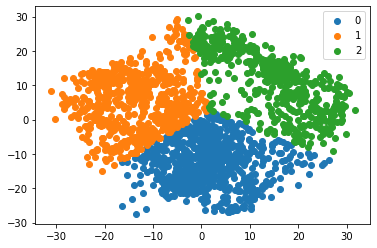

In [61]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.legend()
plt.show()

#### Plotting the Cluster Centroids

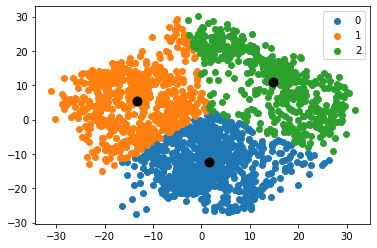

In [62]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## DBscan Clustring

In [63]:
from sklearn.cluster import DBSCAN

In [64]:
data2=df

In [65]:
data2['Education']= label_encoder.fit_transform(data2['Education'])
data2['Marital_Status']= label_encoder.fit_transform(data2['Marital_Status'])

In [66]:
data2=data2.drop("Dt_Customer", axis=1)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 

In [68]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data2)

In [69]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_scaled)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0  3.845929 -0.297301
1 -2.194092  0.322732
2  1.738884 -0.151699
3 -2.667460 -1.492931
4 -0.296501  0.084319


In [70]:
db_default = DBSCAN(eps=0.4, min_samples=5).fit(X_principal)
#predict the labels of clusters.
labels = db_default.fit_predict(X_principal)
print(labels)

[0 0 0 ... 0 0 0]


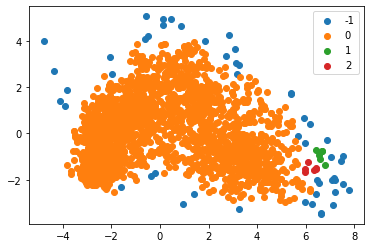

In [71]:
#Getting unique labels
 
u_labels = np.unique(labels)

X_principal=np.array(X_principal)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_principal[labels == i , 0] , X_principal[labels == i , 1] , label = i)
plt.legend()
plt.show()

#### Getting centroid for DBScan

In [72]:
clf = NearestCentroid()
clf.fit(X_principal, labels)


NearestCentroid()

#### Plotting the Cluster Centroids

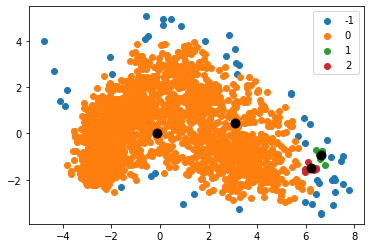

In [73]:
for i in u_labels:
    plt.scatter(X_principal[labels == i , 0] , X_principal[labels == i , 1] , label = i)
plt.legend()
plt.scatter(clf.centroids_[:,0] , clf.centroids_[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()